<a href="https://colab.research.google.com/github/modhudeb/Mall-Customer-Segmentation/blob/main/Mall_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data

In [2]:
data = pd.read_csv('Mall_Customers_Data.csv', index_col='CustomerID')
df = data.copy()

# Preprocessing

In [3]:
df.columns
df.columns = ['Gender', 'Age', 'AnnIncome',
       'SpendScore']

In [4]:
df.head(3)

,Gender,Age,AnnIncome,SpendScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      200 non-null    object
 1   Age         200 non-null    int64 
 2   AnnIncome   200 non-null    int64 
 3   SpendScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Handling object type data
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

## EDA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
AnnIncome,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
SpendScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [9]:
dist = df.Gender.value_counts()
dist

0    112
1     88
Name: Gender, dtype: int64

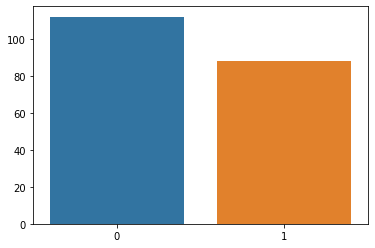

In [10]:
sns.barplot(x=dist.index, y=dist.values)

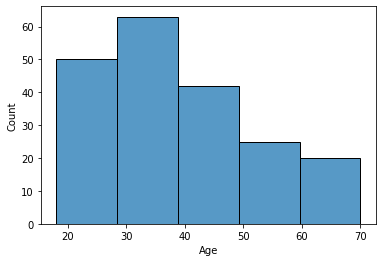

In [11]:
sns.histplot(x=df.Age, bins=5,binrange=[18,70])

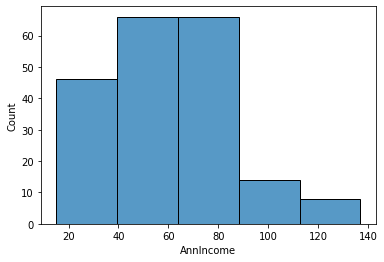

In [12]:
sns.histplot(x=df.AnnIncome,bins=5)

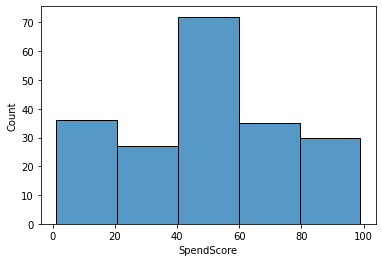

In [13]:
sns.histplot(x=df.SpendScore, bins=5)

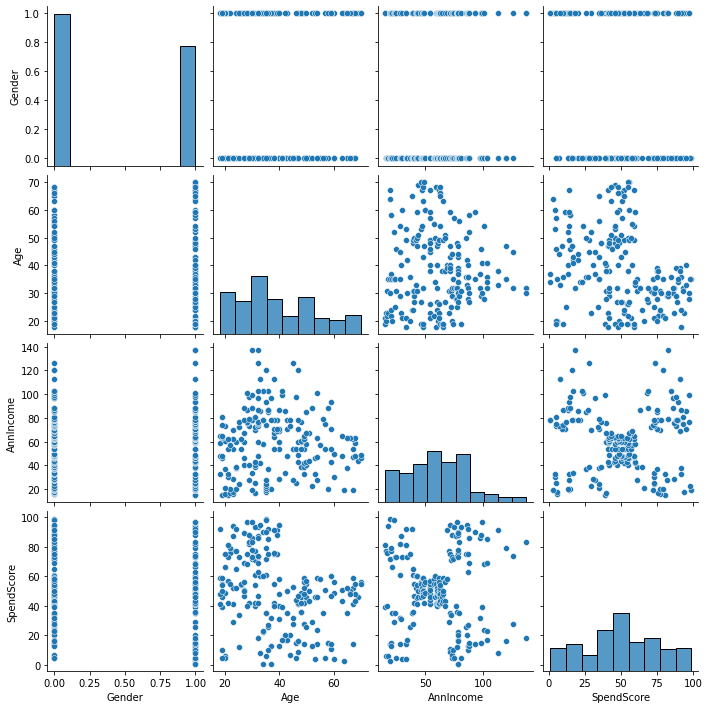

In [14]:
# using this we will get an idea about which pairs of column is most suitably clustered
sns.pairplot(df)

From this vizual we got to know that AnnIncome and SpendScore is most clustered pair 

# Algorithm

## K-means

In [15]:
from sklearn.cluster import KMeans

In [16]:
# for Kmeans clustering we will need perfect value of 'n_cluster'
# to find this value we will need ELBOW method testing
inertiaz = []
ks= np.arange(1,10)
for k in ks:
  kmean = KMeans(n_clusters=k)
  kmean.fit(df[['AnnIncome','SpendScore']])
  inertiaz.append(kmean.inertia_)

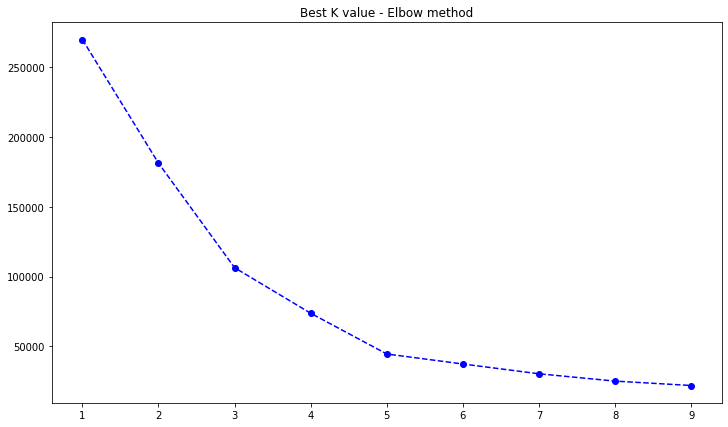

In [17]:
plt.figure(1,figsize=(12,7))
plt.plot(ks, inertiaz,'bo--')
plt.title('Best K value - Elbow method')
plt.show()

from this plot we can see the best value of n_cluster is '4' or '5'

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['AnnIncome','SpendScore']])

In [19]:
df.head(3)

,Gender,Age,AnnIncome,SpendScore,Cluster
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,3
3,0,20,16,6,2


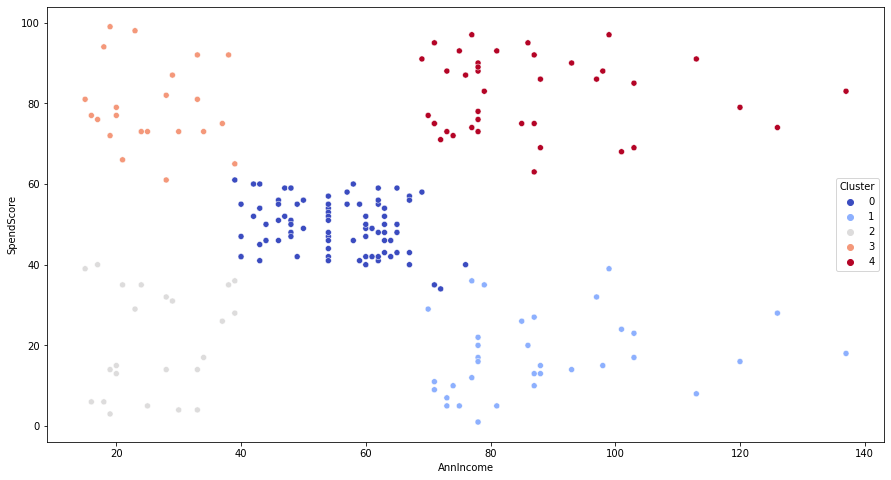

In [20]:
plt.figure(1, figsize=(15,8))
sns.scatterplot(x= df.AnnIncome, y=df.SpendScore, hue = df.Cluster, palette='coolwarm')

## validation

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [22]:
silScore = silhouette_score(df[['AnnIncome', 'SpendScore']], df.Cluster)
silScore

0.553931997444648

In [23]:
silSamp1 = silhouette_samples(df[['AnnIncome', 'SpendScore']], df.Cluster)
silSamp1

array([ 0.41700493,  0.69637752,  0.6399526 ,  0.6964831 ,  0.39230007,
        0.6981303 ,  0.64910316,  0.65972193,  0.63021343,  0.66350398,
        0.67788678,  0.62355268,  0.68003912,  0.71908624,  0.68070792,
        0.72573786,  0.48557434,  0.54505971,  0.58062414,  0.631684  ,
        0.46597803,  0.6774284 ,  0.64167396,  0.67170097,  0.66126882,
        0.70488566,  0.48931822,  0.30121073,  0.49570828,  0.6847372 ,
        0.60630845,  0.612474  ,  0.57697817,  0.61775968,  0.60922585,
        0.63936997,  0.58581667,  0.52897452,  0.42116018,  0.48378692,
        0.09342298,  0.54589636, -0.00927769,  0.1170758 ,  0.31116673,
        0.0507214 ,  0.38841392,  0.43312564,  0.29204034,  0.29204034,
        0.5203998 ,  0.30155503,  0.51561237,  0.34144075,  0.48988757,
        0.37332421,  0.59860522,  0.54128572,  0.63883859,  0.59367906,
        0.55806656,  0.57952023,  0.64920886,  0.50415514,  0.67809813,
        0.52881485,  0.68358333,  0.66547762,  0.52881485,  0.65

In [24]:
# plt.fill_betweenx shortcut function

def plotFill_bet_X(clusterValues, sSamples:silhouette_samples, ylow = 10 ):
  ylow = 15
  uVals = set(clusterValues)
  for uVal in uVals :
    xSamp = sSamples[clusterValues == uVal]
    xSamp.sort()
    yup = ylow + xSamp.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0, xSamp)
    ylow = 15 + yup

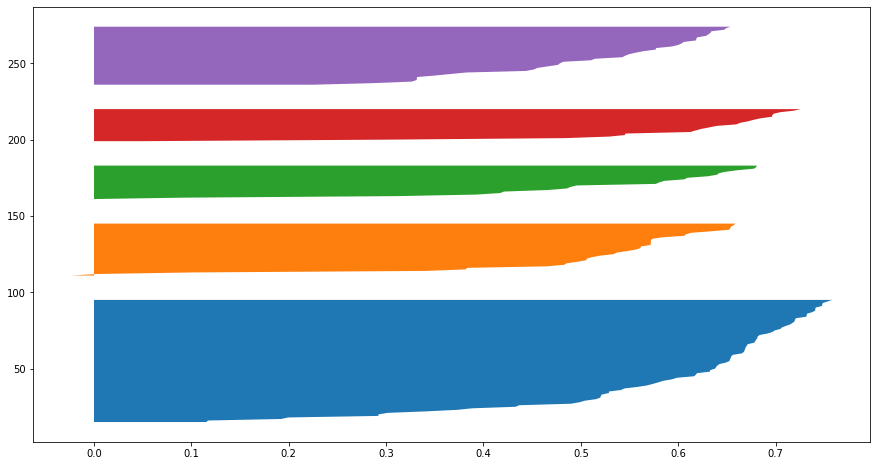

In [25]:
plt.figure(1, figsize = (15,8))
plotFill_bet_X(df.Cluster.values, silSamp1)
plt.show()

# Hierarchical algorith

## AgglomerativeClustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
# agglo = AgglomerativeClustering?

So here we need a perfect 'n_cluster' value. But in this algo we cannot use Elbow method. so follow on --

In [28]:
def scoreComparison(text:str, itr, n_clus=2) :
  print(f"SilhouetteScore      {text}")
  for idk in itr:
    if type(itr) == range :
      agglo = AgglomerativeClustering(n_clusters = idk)
    else :
      agglo = AgglomerativeClustering(n_clusters = n_clus, linkage=idk)
    temp = agglo.fit_predict(df[['AnnIncome', 'SpendScore']])
    silScore = silhouette_score(df[['AnnIncome', 'SpendScore']], temp)
    print(f"{round(silScore,2)}                 {idk}")


In [29]:
scoreComparison("K-value", range(2,10)) # custom function

SilhouetteScore      K-value
0.37                 2
0.46                 3
0.49                 4
0.55                 5
0.54                 6
0.52                 7
0.43                 8
0.44                 9


let's see the graph for k values 4,5,6,7

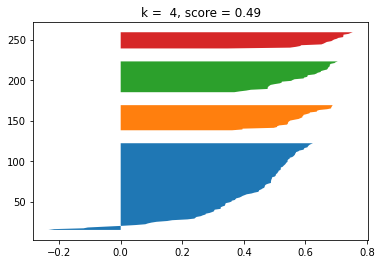

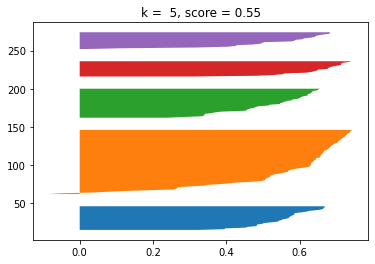

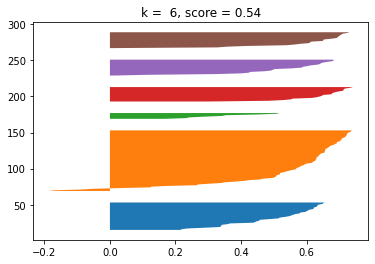

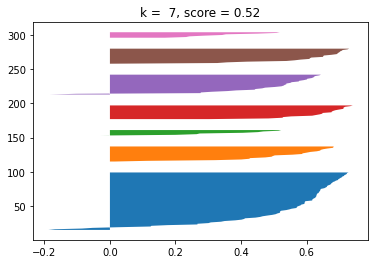

In [30]:
for k in range(4,8) :
  agglo = AgglomerativeClustering(n_clusters= k)
  temp = agglo.fit_predict(df[['AnnIncome', 'SpendScore']])
  silScore = silhouette_score(df[['AnnIncome', 'SpendScore']], temp)
  silSamp = silhouette_samples(df[['AnnIncome', 'SpendScore']], temp)

  plotFill_bet_X(temp,silSamp)    # custom function

  plt.title(f"k =  {k}, score = {round(silScore,2)}")
  plt.show()
  print()

From the vizualization it is clear that n_cluster = 5 is most appropriate

In [31]:
scoreComparison("Linkage", {'ward', 'complete', 'average', 'single'}, n_clus=5)

SilhouetteScore      Linkage
0.55                 complete
0.48                 average
0.55                 ward
0.27                 single


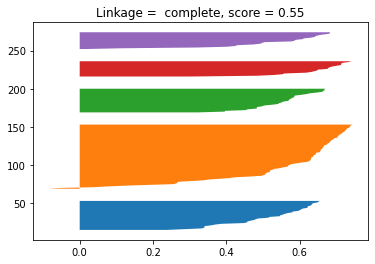

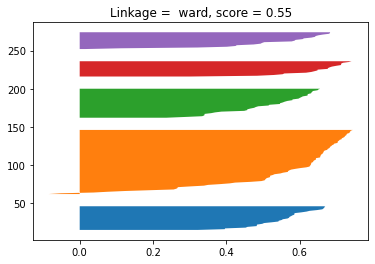

In [32]:
linkagess = ['complete', 'ward']
for lkg in linkagess :
  agglo = AgglomerativeClustering(n_clusters= 5, linkage=lkg)
  temp = agglo.fit_predict(df[['AnnIncome', 'SpendScore']])
  silScore = silhouette_score(df[['AnnIncome', 'SpendScore']], temp)
  silSampp = silhouette_samples(df[['AnnIncome', 'SpendScore']], temp)

  plotFill_bet_X(temp,silSampp)    # custom function

  plt.title(f"Linkage =  {lkg}, score = {round(silScore,2)}")
  plt.show()
  print()

since both linkage gave same result, choosing one

In [33]:
agglo = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
df.Cluster = agglo.fit_predict(df[['AnnIncome', 'SpendScore']])

In [34]:
df.head()

,Gender,Age,AnnIncome,SpendScore,Cluster
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,3
3,0,20,16,6,4
4,0,23,16,77,3
5,0,31,17,40,4


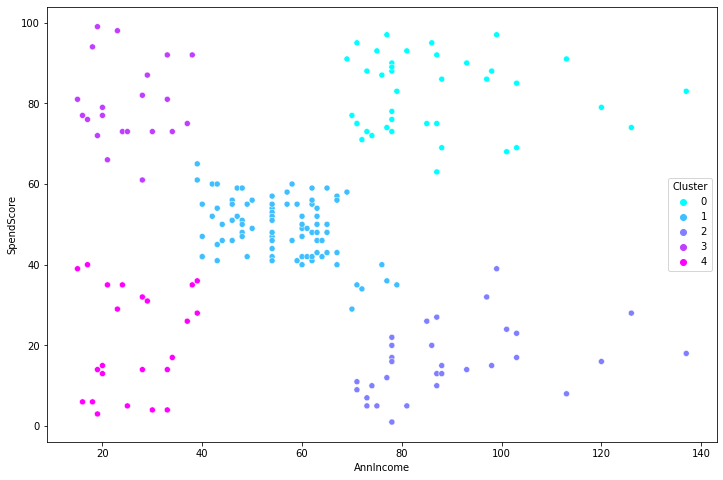

In [35]:
plt.figure(1, figsize=(12,8))
sns.scatterplot(x= df.AnnIncome, y=df.SpendScore, hue = df.Cluster, palette='cool')

# DBSCAN Algorithm

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import DBSCAN

In [37]:
# denb = DBSCAN?

In [38]:
epss = np.linspace(0.4, 6, 50)
# epss = np.arange(1,5)
minSamp = np.arange(1,10)

In [39]:
comb = np.array([[round(e,2),m] for e in epss for m in minSamp])

In [40]:
janina = []
for ep,ms in comb:
  denb = DBSCAN(eps=ep, min_samples=ms, n_jobs=-1)
  label = denb.fit_predict(df[['AnnIncome', 'SpendScore']])
  try :
    score = silhouette_score(df[['AnnIncome', 'SpendScore']], label)
  except :
    continue
  janina.append([ep, ms, round(score,2)])

In [41]:
janina.sort()

In [42]:
print("eps      minSamp       Silscore")
[f" {i}     {j}            {k}" for i,j,k in janina]

eps      minSamp       Silscore


[' 0.4     1.0            0.04',
 ' 0.4     2.0            -0.5',
 ' 0.51     1.0            0.04',
 ' 0.51     2.0            -0.5',
 ' 0.63     1.0            0.04',
 ' 0.63     2.0            -0.5',
 ' 0.74     1.0            0.04',
 ' 0.74     2.0            -0.5',
 ' 0.86     1.0            0.04',
 ' 0.86     2.0            -0.5',
 ' 0.97     1.0            0.04',
 ' 0.97     2.0            -0.5',
 ' 1.09     1.0            0.15',
 ' 1.09     2.0            -0.37',
 ' 1.09     3.0            -0.43',
 ' 1.2     1.0            0.15',
 ' 1.2     2.0            -0.37',
 ' 1.2     3.0            -0.43',
 ' 1.31     1.0            0.15',
 ' 1.31     2.0            -0.37',
 ' 1.31     3.0            -0.43',
 ' 1.43     1.0            0.21',
 ' 1.43     2.0            -0.22',
 ' 1.43     3.0            -0.36',
 ' 1.43     4.0            -0.35',
 ' 1.54     1.0            0.21',
 ' 1.54     2.0            -0.22',
 ' 1.54     3.0            -0.36',
 ' 1.54     4.0            -0.35',
 ' 1.66

There is no such value that can beat other algorithm's score. So this algorithm won't work well